<a href="https://colab.research.google.com/github/campusplage/multidimensional-data/blob/master/colabs/2_Utilisation_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIASHS cours de master sur l'analyse de données multidimensionnelle
## TP2: Utiliser l'analyse en composantes principales
---
**Dans ce TP, vous allez apprendre à:**
* Utiliser l'implémentation de l'ACP de `scikit-learn`
* Exploiter et visualiser les résultats avec `seaborn`
---


## 1. Introduction

### a. Objectifs de ce TP

Dans ce TP, on va mettre en pratique le cours sur l'analyse en composantes principales (ACP), qui est un moyen très classique pour essayer d'explorer des données multidimensionnelles pour en tirer du sens.

### c. Remerciements

Les jeux de données de ce TP introductif sur l'ACP proviennent des resources mises en place par [François Husson](https://husson.github.io/).
Vous êtes chaleureusement invités à consulter [son site](https://husson.github.io/MOOC.html) qui vous permettra de compléter le cours et d'avoir un autre angle d'approche.

La principale différence par rapport aux support mis en place par Husson est qu'on utilisera ici le langage Python plutôt que R.

## 2. Mise en place
### a. Chargement des données

Pour ce TP, on va charger à nouveau les données de températures des villes européennes, comme dans le précédent.


In [0]:
# on commence par importer le package pandas
import pandas

# Une fois pandas chargé, il est facile de lire des fichiers CSV qui contiennent des données.
# Chargeons les données de température des villes telles qu'utilisées dans la vidéo de Husson d'introduction à l'ACP.
data = pandas.read_csv('http://factominer.free.fr/livreV2/temperat.csv',
                       encoding = "ISO-8859-1", sep=';')
data = data.rename(columns={data.columns[0]: 'Ville'})
data = data.set_index(data.columns[0])

# affichons la table
data

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,Moyenne,Amplitude,Latitude,Longitude,Région
Ville,,,,,,,,,,,,,,,,,
Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
Athènes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est
Copenhague,-0.4,-0.4,1.3,5.8,11.1,15.4,17.1,16.6,13.3,8.8,4.1,1.3,7.8,17.5,55.4,12.3,Nord
Dublin,4.8,5.0,5.9,7.8,10.4,13.3,15.0,14.6,12.7,9.7,6.7,5.4,9.3,10.2,53.2,6.1,Nord
Helsinki,-5.8,-6.2,-2.7,3.1,10.2,14.0,17.2,14.9,9.7,5.2,0.1,-2.3,4.8,23.4,60.1,25.0,Nord
Kiev,-5.9,-5.0,-0.3,7.4,14.3,17.8,19.4,18.5,13.7,7.5,1.2,-3.6,7.1,25.3,50.3,30.3,Est


### b. Application de l'ACP de `scikit-learn`

Nous verrons plus tard comment recalculer nous même une ACP, et ainsi implémenter en python ce qu'on a vu en cours.

En attendant, nous allons commencer par utiliser une implémentation fiable et (très) populaire, celle de [`scikit-learn`](https://scikit-learn.org/stable/). Il s'agit d'une bibliothèque de modèles d'apprentissage automatique en Python.
Pour ce qui nous concerne aujourd'hui, `scikit-learn` fournit:
* La normalisation
* Le calcul de l'ACP et de ce qui va avec.

Vous trouverez la documentation correspondante [ici](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


> _Pour fonctionner, `scikit-learn` manipule les données sous la forme de `ndarray`, tels que définis dans l'omniprésente bibliothèque de calcul [`numpy`](https://numpy.org/). Cette bibliothèque constitue la fondation de l'essentiel du calcul sur données en python. Il est donc bon d'en connaître le nom._



In [0]:
# Importons scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extrayons les données de température
data_columns = data.columns[:12]
X = data[data_columns]

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
X = StandardScaler().fit_transform(X)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca = PCA(n_components=n_components)

# Puis de l'appliquer sur les données
pca.fit(X)  


['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solve

(35, 3)


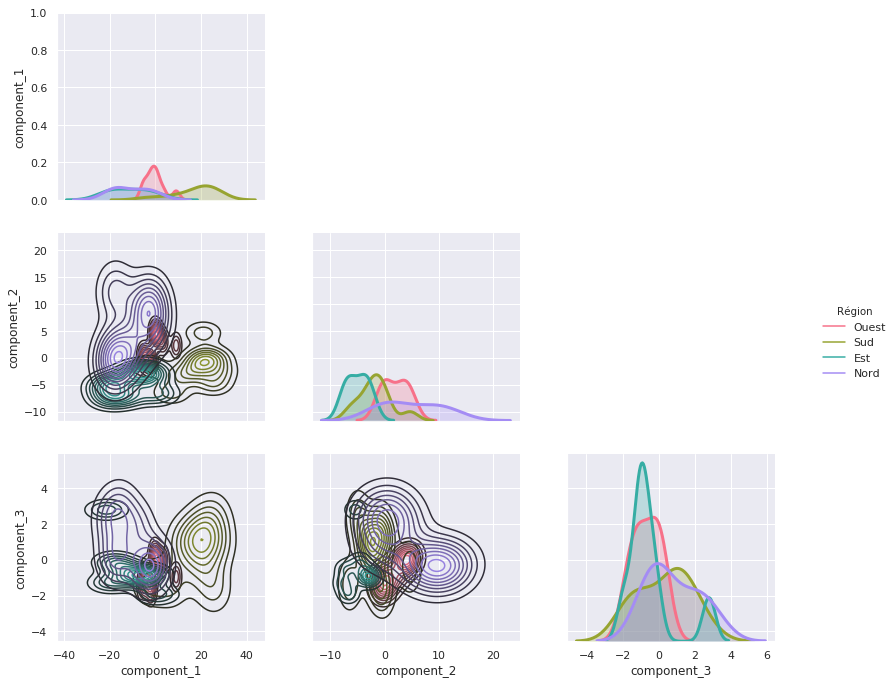

In [0]:
X_new = pca.transform(X)
print(X_new.shape)

import seaborn as sns
sb.set()
import matplotlib.pyplot as plt
for comp in range(1, n_components + 1):
  data['component_%d' % comp] = X_new[:, comp-1]
PCA_columns = data.columns[-n_components:]

g = sns.PairGrid(data, vars=PCA_columns, hue="Région", palette="husl")
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, shade=True)

# on enlève la partie supérieure de l'affichage, qui est inutile
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g = g.add_legend()
g.fig.set_size_inches(13,10)


In [0]:
PCA_columns

Index(['component_2', 'component_3'], dtype='object')

In [0]:
data

,100m,Longueur,Poids,Hauteur,400m,110m H,Disque,Perche,Javelot,1500m,Classement,Points,Competition,component_1,component_2,component_3
Unnamed: 0,,,,,,,,,,,,,,,,
Sebrle,10.85,7.84,16.36,2.12,48.36,14.05,48.72,5.00,70.52,280.01,1,8893,JO,0.236802,13.080909,1.198712
Clay,10.44,7.96,15.23,2.06,49.19,14.13,50.11,4.90,69.71,282.00,2,8820,JO,2.413311,12.714501,2.311425
Karpov,10.50,7.81,15.93,2.09,46.81,13.97,51.65,4.60,55.54,278.11,3,8725,JO,-0.199697,-0.644892,8.285202
Macey,10.89,7.47,15.73,2.15,48.97,14.56,48.34,4.40,58.46,265.42,4,8414,JO,-13.218942,0.488027,5.256989
Warners,10.62,7.74,14.48,1.97,47.97,14.01,43.73,4.90,55.39,278.05,5,8343,JO,-0.827396,-3.025570,0.548327
Zsivoczky,10.91,7.14,15.31,2.12,49.40,14.95,45.62,4.70,63.45,269.54,6,8287,JO,-9.754857,4.752802,0.839477
Hernu,10.97,7.19,14.65,2.03,48.73,14.25,44.72,4.80,57.76,264.35,7,8237,JO,-14.518756,-1.313223,2.032211
Nool,10.80,7.53,14.26,1.88,48.81,14.80,42.05,5.40,61.33,276.33,8,8235,JO,-3.140436,2.089610,-2.648564
Bernard,10.69,7.48,14.80,2.12,49.13,14.17,44.75,4.40,55.27,276.31,9,8225,JO,-2.418485,-2.937788,1.605670
